In [2]:
import openTSNE
import OpTSNE
from OpTSNE.affinity import PerplexityBasedNN as OpPerplexityBasedNN
from OpTSNE.initialization import pca as OpPCA
from OpTSNE import TSNE as OpTSNE
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt 
import utils
import time

In [3]:
perplexity = 30
random_state = 42
n_jobs = 16
initial_alpha = 1
n_components = 2

In [4]:
X, labels = make_swiss_roll(n_samples=10000, noise=0.0, random_state=42)

In [5]:
utils.plot_swiss_roll_plotly(X, labels, n_samples=3000, title="Swiss Roll")

In [6]:
affinities_obj = OpPerplexityBasedNN(
    X,
    perplexity=perplexity,
    metric="euclidean",
    n_jobs=n_jobs,
    random_state=random_state,
)

pca_init = OpPCA(X, random_state=random_state)

initial_embedding = OpTSNE(
    n_components=n_components, dof=initial_alpha, random_state=random_state
).prepare_initial(X=X, affinities=affinities_obj, initialization=pca_init)

In [ ]:
tic = time.time()
initial_embedding.optimize(n_iter = 10, inplace = True, optimize_for_alpha = True, negative_gradient_method = "bh", verbose = True, dof = 1, dof_learning_rate = 0.8, n_jobs = 16)
toc = time.time()
runtime = toc - tic
print(f"Runtime: {runtime:.2f}s")

===> Running optimization with exaggeration=1.00, lr=10000.00 for 10 iterations...
sum_Q obtained in estimate_negative_gradient_bh: 98660533.41444394
alpha_grad_neg obtained in estimate_negative_gradient_bh: 1.0729655833099848e-15
alpha used in estimate_positive_gradient_nn: 1.0
alpah_grad_pos obtained in estimate_positive_gradient_nn: -1.056047446153594e-19
sum_Q obtained in estimate_negative_gradient_bh: 99567745.43180597
alpha_grad_neg obtained in estimate_negative_gradient_bh: 2.550581266929685e-14
alpha used in estimate_positive_gradient_nn: 1.0000000000000009
alpah_grad_pos obtained in estimate_positive_gradient_nn: 2.4568434019275535e-19
sum_Q obtained in estimate_negative_gradient_bh: 99919487.11711963
alpha_grad_neg obtained in estimate_negative_gradient_bh: 1.6574836981705308e-12
alpha used in estimate_positive_gradient_nn: 1.0000000000000213
alpah_grad_pos obtained in estimate_positive_gradient_nn: 1.3594160456781626e-17
sum_Q obtained in estimate_negative_gradient_bh: 99991

In [ ]:
records = initial_embedding.optimization_stats
alpha_grad = records.alpha_gradients
alphas = records.alphas
kls = records.KLs

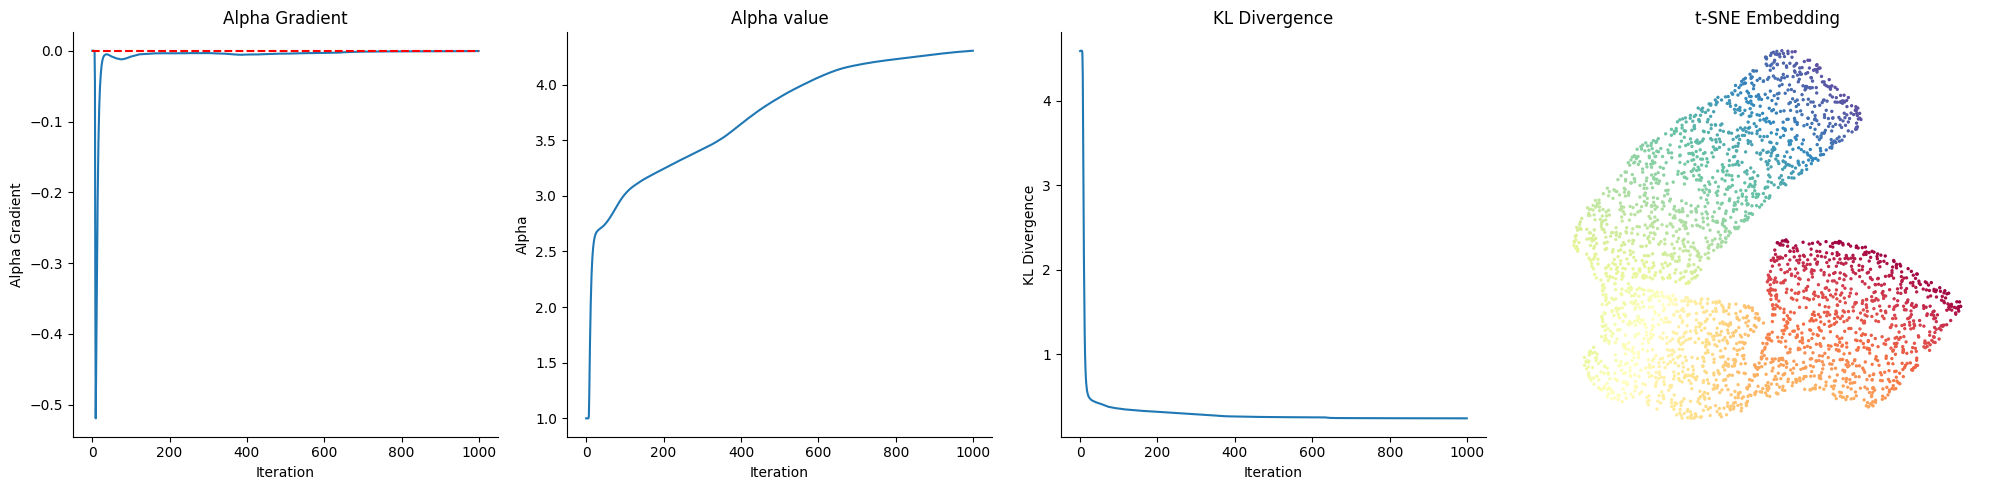

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].plot(alpha_grad)
ax[0].set_title("Alpha Gradient")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Alpha Gradient")
ax[0].hlines(0, 0, len(alpha_grad), linestyles="--", colors="red")

ax[1].plot(alphas)
ax[1].set_title("Alpha value")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Alpha")

ax[2].plot(kls)
ax[2].set_title("KL Divergence")
ax[2].set_xlabel("Iteration")
ax[2].set_ylabel("KL Divergence")

ax[3].scatter(initial_embedding[:, 0], initial_embedding[:, 1], c=labels, cmap="Spectral", s=2)
ax[3].set_title("t-SNE Embedding")
ax[3].spines["left"].set_visible(False)
ax[3].spines["bottom"].set_visible(False)
ax[3].set_xticks([])
ax[3].set_yticks([])

for i in range(4):
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

print("Final KL Divergence: ", kls[-1])
print("Final Alpha: ", alphas[-1])
print("Final Alpha Gradient: ", alpha_grad[-1])